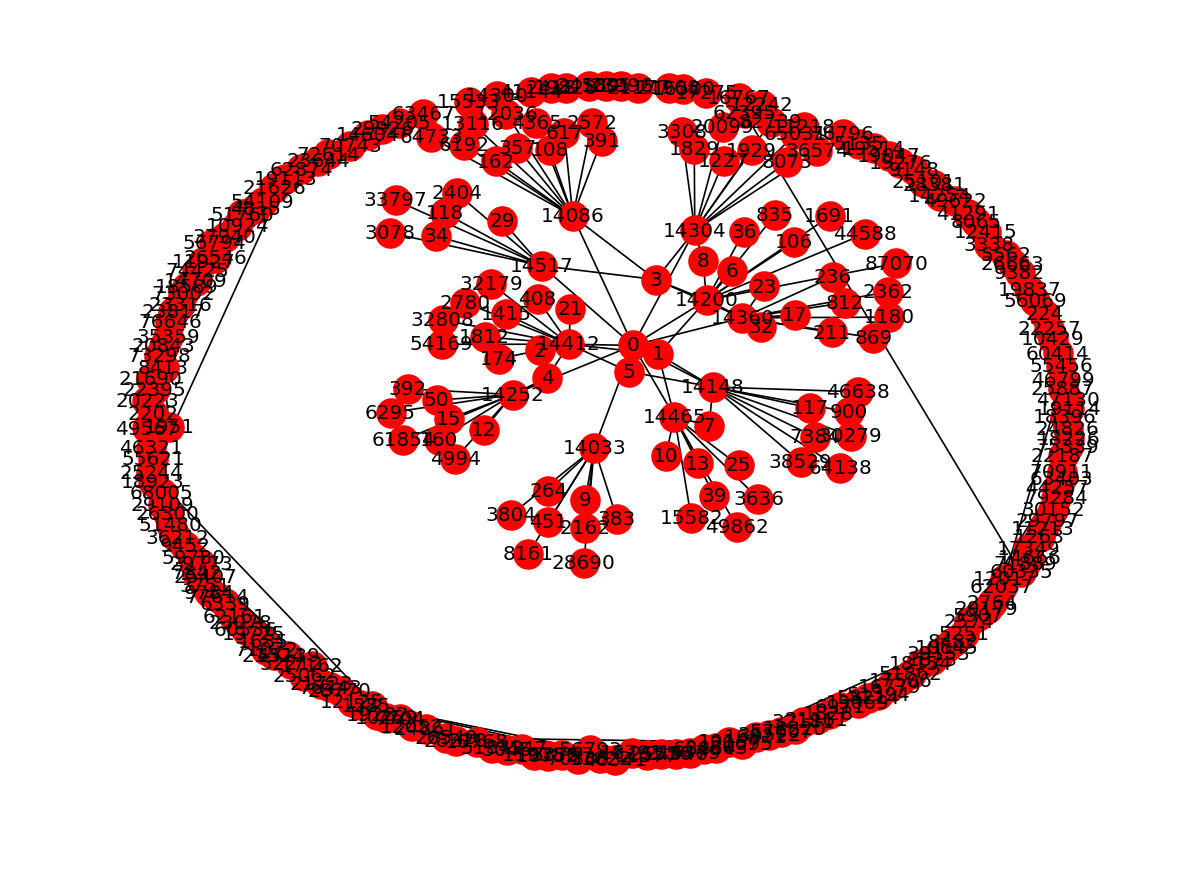

In [13]:
import community
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
#G = nx.erdos_renyi_graph(30, 0.05,seed=224)
#G = nx.karate_club_graph()
G = nx.read_edgelist('downsample_syl_2_meta_100_MK_10_tuple_graph.txt', nodetype=int, data=(('weight',float),))
#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


#nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.figure(num=None, dpi=120, facecolor='w', edgecolor='k')
nx.draw(G,pos,with_labels=True)

C:\Users\zangs\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\zangs\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\zangs\Anaconda2\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\zangs\Anaconda2\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

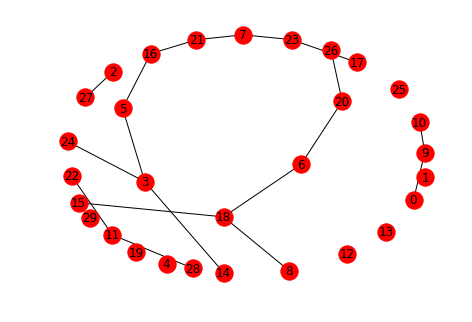

In [2]:
#plt.figure(num=None, dpi=120, facecolor='w', edgecolor='k')
import community
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
G = nx.erdos_renyi_graph(30, 0.05,seed=224)
pos = nx.spring_layout(G)

nx.draw(G,pos,with_labels=True)

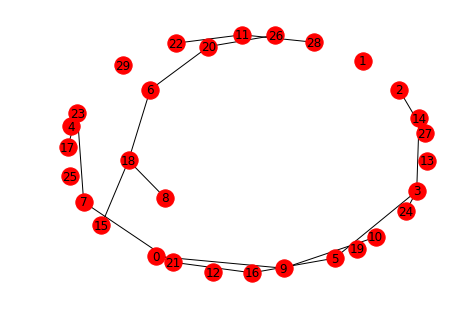

In [5]:
nx.draw(G,pos,with_labels=True)

In [6]:
partition

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 3,
 6: 5,
 7: 6,
 8: 5,
 9: 0,
 10: 0,
 11: 7,
 12: 8,
 13: 9,
 14: 3,
 15: 5,
 16: 3,
 17: 6,
 18: 5,
 19: 10,
 20: 5,
 21: 6,
 22: 7,
 23: 6,
 24: 3,
 25: 11,
 26: 5,
 27: 2,
 28: 7,
 29: 12}

In [20]:
print G.edges(data = True)

[(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 5, {}), (0, 6, {}), (0, 15, {}), (0, 16, {}), (0, 17, {}), (0, 22, {}), (0, 37, {}), (0, 39, {}), (0, 40, {}), (0, 41, {}), (0, 170, {}), (0, 44, {}), (0, 46, {}), (0, 47, {}), (0, 48, {}), (0, 178, {}), (0, 58, {}), (0, 59, {}), (0, 62, {}), (0, 64, {}), (0, 66, {}), (0, 199, {}), (0, 72, {}), (0, 74, {}), (0, 206, {}), (0, 81, {}), (0, 212, {}), (0, 90, {}), (0, 165, {}), (0, 227, {}), (0, 273, {}), (0, 105, {}), (0, 108, {}), (0, 122, {}), (0, 124, {}), (1, 33, {}), (1, 35, {}), (1, 100, {}), (1, 7, {}), (1, 113, {}), (1, 67, {}), (1, 23, {}), (1, 132, {}), (1, 29, {}), (2, 137, {}), (2, 52, {}), (2, 31, {}), (3, 194, {}), (3, 264, {}), (3, 139, {}), (3, 12, {}), (3, 88, {}), (3, 56, {}), (3, 123, {}), (4, 224, {}), (4, 34, {}), (4, 75, {}), (4, 214, {}), (4, 103, {}), (4, 11, {}), (4, 13, {}), (4, 77, {}), (4, 210, {}), (4, 51, {}), (4, 150, {}), (4, 218, {}), (4, 143, {}), (4, 28, {}), (4, 261, {}), (5, 240, {}), (5, 254, {}), (

to understand the partition code, I was trying to see how the 'community' code graph is different from the original graph, in this example it doesn't seem to be different. However, maybe it would be different in another graph?

Also, how can this work on unweighted network? how does it work?

# useful code below: coloring showing community

## these examples, in pair, shows the contrast between original network and detected communities

### example 1

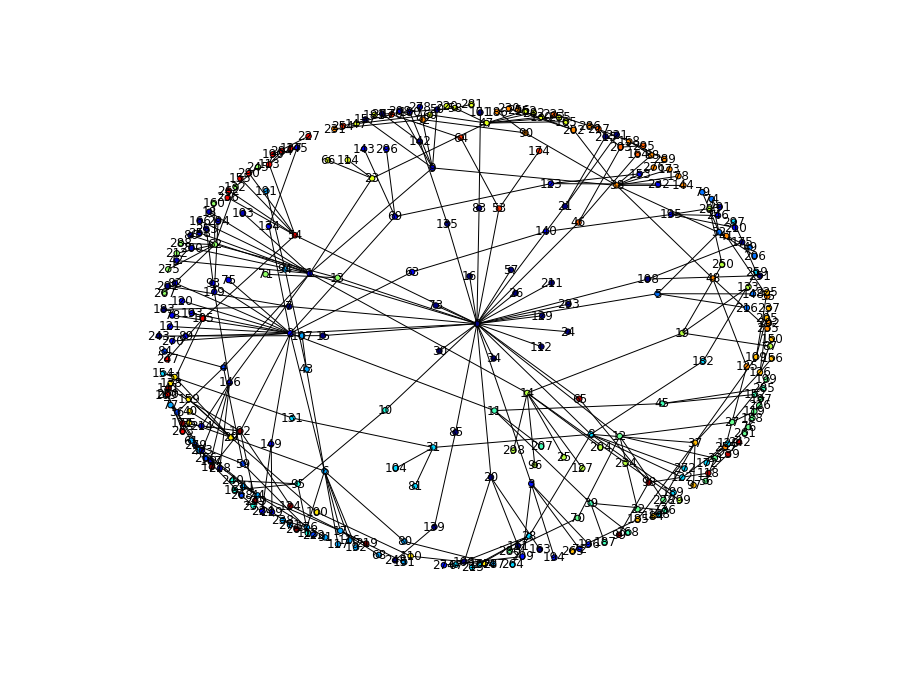

In [13]:
import networkx as nx
import community
import matplotlib.pyplot as plt
%matplotlib inline
G = nx.random_graphs.powerlaw_cluster_graph(300, 1, .4)
nx.transitivity(G)

#find modularity
part = community.best_partition(G)
mod = community.modularity(part,G)
plt.figure(num=None, figsize=(12, 9), dpi=120, facecolor='w', edgecolor='k')
#plot, color nodes using community structure
values = [part.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=True)
plt.show()

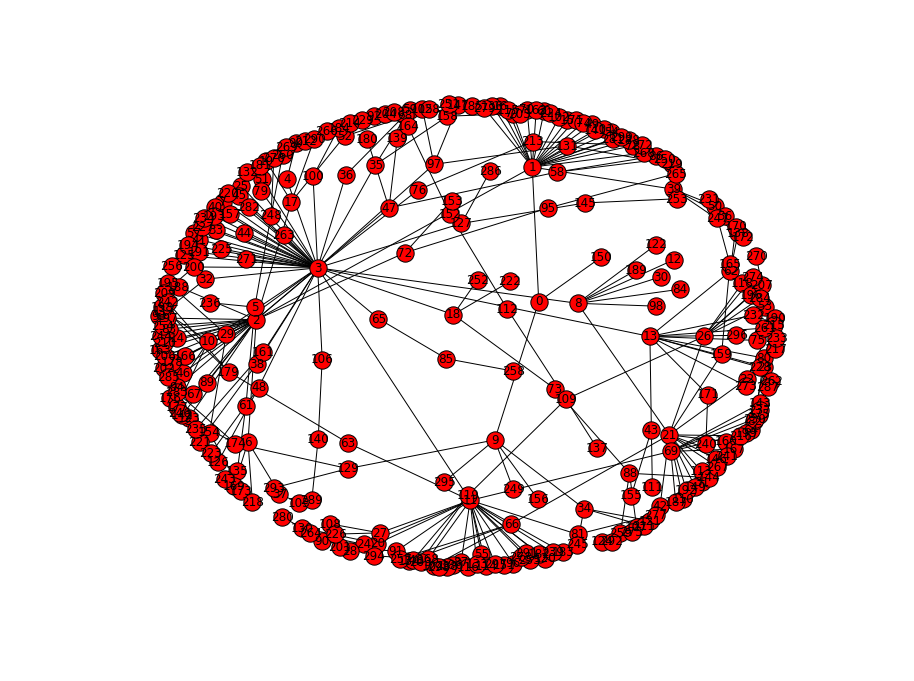

In [4]:
pos = nx.spring_layout(G)
plt.figure(num=None, figsize=(12, 9), dpi=120, facecolor='w', edgecolor='k')
nx.draw(G,pos,with_labels=True)

### example 2

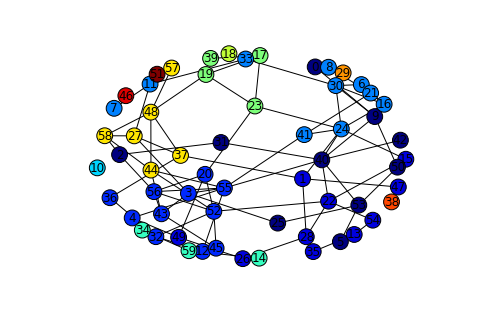

In [18]:
G = nx.erdos_renyi_graph(60, 0.05,seed=224)
#G = nx.karate_club_graph()
nx.transitivity(G)

#find modularity
part = community.best_partition(G)
mod = community.modularity(part,G)
#plt.figure(num=None, figsize=(12, 9), dpi=120, facecolor='w', edgecolor='k')
#plot, color nodes using community structure
values = [part.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=250, with_labels=True)
plt.show()

In [22]:
#supposedly this shows the cluster/community assignment of each node, as shown in the cell below?
print values

[0, 1, 0, 2, 2, 0, 3, 3, 3, 0, 4, 3, 2, 1, 5, 1, 3, 6, 7, 6, 2, 3, 1, 6, 3, 0, 1, 8, 1, 9, 3, 0, 2, 3, 5, 1, 2, 8, 10, 6, 0, 3, 0, 2, 8, 2, 11, 1, 8, 1, 0, 12, 2, 0, 1, 2, 2, 8, 8, 5]


In [23]:
print G.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [24]:
part

{0: 0,
 1: 1,
 2: 0,
 3: 2,
 4: 2,
 5: 0,
 6: 3,
 7: 3,
 8: 3,
 9: 0,
 10: 4,
 11: 3,
 12: 2,
 13: 1,
 14: 5,
 15: 1,
 16: 3,
 17: 6,
 18: 7,
 19: 6,
 20: 2,
 21: 3,
 22: 1,
 23: 6,
 24: 3,
 25: 0,
 26: 1,
 27: 8,
 28: 1,
 29: 9,
 30: 3,
 31: 0,
 32: 2,
 33: 3,
 34: 5,
 35: 1,
 36: 2,
 37: 8,
 38: 10,
 39: 6,
 40: 0,
 41: 3,
 42: 0,
 43: 2,
 44: 8,
 45: 2,
 46: 11,
 47: 1,
 48: 8,
 49: 1,
 50: 0,
 51: 12,
 52: 2,
 53: 0,
 54: 1,
 55: 2,
 56: 2,
 57: 8,
 58: 8,
 59: 5}

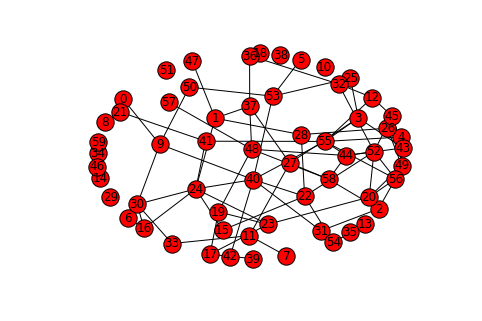

In [15]:
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)

# Secondary conclusion

1. in example 2 above we can see the different more clearly. I think the point of community detection is that if A and B are two nodes that are connected by an edge, but A is tightly interconnected with a group of other nodes Group C and B is tightly connected with a different Group D, the A and B might as well belong to different communities even though they share an edge.

2. you can basically use this community detection code out of the box and see the results. 

3. before that, you need to build the net work and have the dist matrix, then you perform some dist thresholding.



# priliminary conclusion

1. the community code from the official website is useless. we need coloring to see the partition. but still, in terms of unweighted network, the partition is in a big part still reflecting the edge connection structure of the original graph.(but observe above, there are still differences)

2. in the case of TS, if you threshold based on dist, then what's left is that if there is an edge between two nodes then it means they are close together in distance. a group of interconnected nodes are similar tone shapes(detected as a community of cluster). That's how it supposed to work. 

3. you can also apply this directly on weighted network? according to the paper yes. According to Sankalp, that would be a little tricky because it might get out of control and the discovered communities are not that good. That is why they applied an explicit step of dist thresholding.



# look at some nx functions, clustering coefficient, transitivity, etc.

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


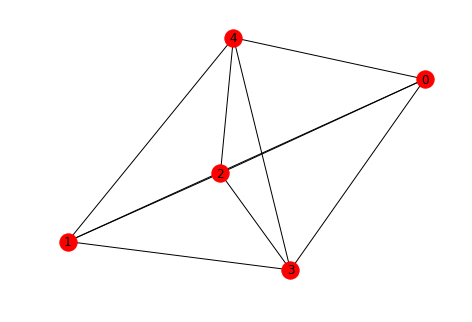

In [28]:
#transitivity
G = nx.complete_graph(5)
print G.edges()
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)

{0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0.0, 10: 0.6666666666666666, 11: 0.0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}
average cc:0.570638478208


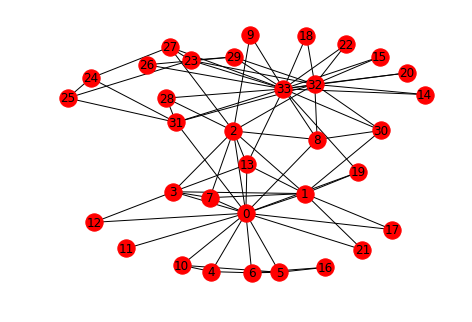

In [38]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)

#clustering coef for each node
print(nx.clustering(G))
#clustering coef for average of all nodes
print 'average cc:'+str(nx.average_clustering(G))
